# Lecture 15


## Python Classes

* class is the cornerstone of object oriented programming (OOP)
* Python is a modern general purpose language, so it has excellent support for OOP
* Introduction on how to create and use classes in Python

## classes
* Classes provide a means of bundling data and functionality together
* Creating a new class creates a new type of object, allowing new instances of that type to be made.
* Each class instance can have attributes attached to it for maintaining its state.
* Class instances can also have methods (defined by its class) for modifying its state.

## a simple example :
We create a **math487** class that holds information for a student.

In [1]:
class math487:
    
    finalScore=0.
    # initiate an object (instance)
    def __init__(self, studentName="", hwScores=[0],testScores=[0]):
        # initiate the values for all the attributes
        self.name=studentName
        self.hw=hwScores
        self.test=testScores
        
    # special thing about methods is that the instance object is passed as the first argument of the function.         
    def printInfo(self):
        print("%s:\n"%(self.name))
        for i in range(len(self.hw)):
            print("HW%d: %5.2f\n"%(i+1,self.hw[i]))
        for i in range(len(self.test)):
            print("Test%d: %5.2f\n"%(i+1,self.test[i]))
        self.getFinalScore()
        print("-"*30,"\n")
        print("Final Score: %5.2f"%self.finalScore)
    
    def getFinalScore(self):
        self.finalScore=(sum(self.hw)+sum(self.test))/(len(self.hw)+len(self.test))
        
        

In [2]:
StudentA=math487("John Doe",[0,80.5,100,99,85.2,89.5],[80.5,60,75,99])

In [3]:
StudentA.printInfo()

John Doe:

HW1:  0.00

HW2: 80.50

HW3: 100.00

HW4: 99.00

HW5: 85.20

HW6: 89.50

Test1: 80.50

Test2: 60.00

Test3: 75.00

Test4: 99.00

------------------------------ 

Final Score: 76.87


In [4]:
StudentA.finalScore

76.87

## Use class to create a PDE solver

Now, consider solving a 2D wave equation
$$
u_{tt}=u_{xx}+u_{yy}, ~~-1<x,y<1,~~t>0,~~u=0~~\text{on the boundary}
$$
with initial data
$$
u(x,y,0)=e^{-40((x-0.4)^2+y^2)},~~u_t(x,y,0)=0.
$$

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

class grid:
    def __init__(self,domain,nx,ny):
        # initiate grid with information for domain and number of grids in each direction
        self.nx=nx
        self.ny=ny
        self.xa,self.xb,self.ya,self.yb=domain
        self.x=np.linspace(self.xa,self.xb,self.nx)
        self.y=np.linspace(self.ya,self.yb,self.ny)
        self.hx=(self.xb-self.xa)/(self.nx-1)
        self.hy=(self.yb-self.ya)/(self.ny-1)
        self.xx,self.yy=np.meshgrid(self.x,self.y)
        
    def info(self):
        print("basic information for this grid:\n")
        print("domain: [%5.2f,%5.2f]X[%5.2f,%5.2f]\n"%(self.xa,self.xb,self.ya,self.yb))
        print("number of grids in each direction: [%d,%d]"%(self.nx,self.ny))
        print("grid spacing in each direction: [%5.2f,%5.2f]"%(self.hx,self.hy))


class operator:
    def __init__(self,grid):
        self.grid=grid
    
    # compute the x derivative of U
    def x(self,U):
        pass

    # compute the y derivative of U  
    def y(self,U):
        pass
    
    # compute the xx derivative of U
    def xx(self,U):
        Uxx=0*U
        Uxx[1:-2,:]=(U[0:-3,:]-2*U[1:-2,:]+U[2:-1,:])/(self.grid.hx**2)
        return Uxx 
    
    def yy(self,U):
        Uyy=0*U
        Uyy[:,1:-2]=(U[:,0:-3]-2*U[:,1:-2]+U[:,2:-1])/(self.grid.hy**2)
        return Uyy
        
    
 
        
def solveWaveEqn2d():
    tf=10.
    # solve the wave equation
    N=101
    nx,ny=N,N
    dt=1./N**2;
    tplot=0.1 # plot time
    pstep=int(tplot/dt) #plot step
    dt = tplot/pstep  # adjust dt

    mg=grid([-1,1,-1,1],nx,ny) # create an grid object
    op=operator(mg) # create finite difference operator for mg
        
    numberOfSteps=int(tf/dt)+1
    #print("numberOfSteps=",numberOfSteps)
    #print("dt=",dt)


    u0=lambda x,y:np.exp(-40.*((x-0.4)**2+y**2))
    
    U0=u0(mg.xx,mg.yy)
    
    U=[U0,U0,U0] # container for 3 layers of solutions
        
    fig = plt.figure(figsize=(8, 8),dpi=300)
    ax = fig.gca(projection='3d') 

    nplot=0
    for step in range(numberOfSteps+1):
        cur=step%3
        prev=(step-1)%3
        new=(step+1)%3
    
        U[new]=2*U[cur]-U[prev]+(dt**2)*(op.xx(U[cur])+op.yy(U[cur]))
        
        # apply boundary conditions
        U[new][(0,-1),:]=0
        U[new][:,(0,-1)]=0
        
        tnew=dt*(step+1)
        if step%pstep==0:
            nplot+=1
            plt.cla()
            ax.plot_wireframe(mg.xx, mg.yy, U[new])
            ax.set_title('t=%5.2f'%tnew)
            ax.set_zlim([0,1])
            fig.savefig('Frame%03d.png' %nplot,dpi=300)
            #print("t=%5.2f\n"%tnew)
 

In [6]:
grid1=grid([0.,1.,2.,4.],10,20)
grid1.info()
grid1.hx

basic information for this grid:

domain: [ 0.00, 1.00]X[ 2.00, 4.00]

number of grids in each direction: [10,20]
grid spacing in each direction: [ 0.11, 0.11]


0.1111111111111111

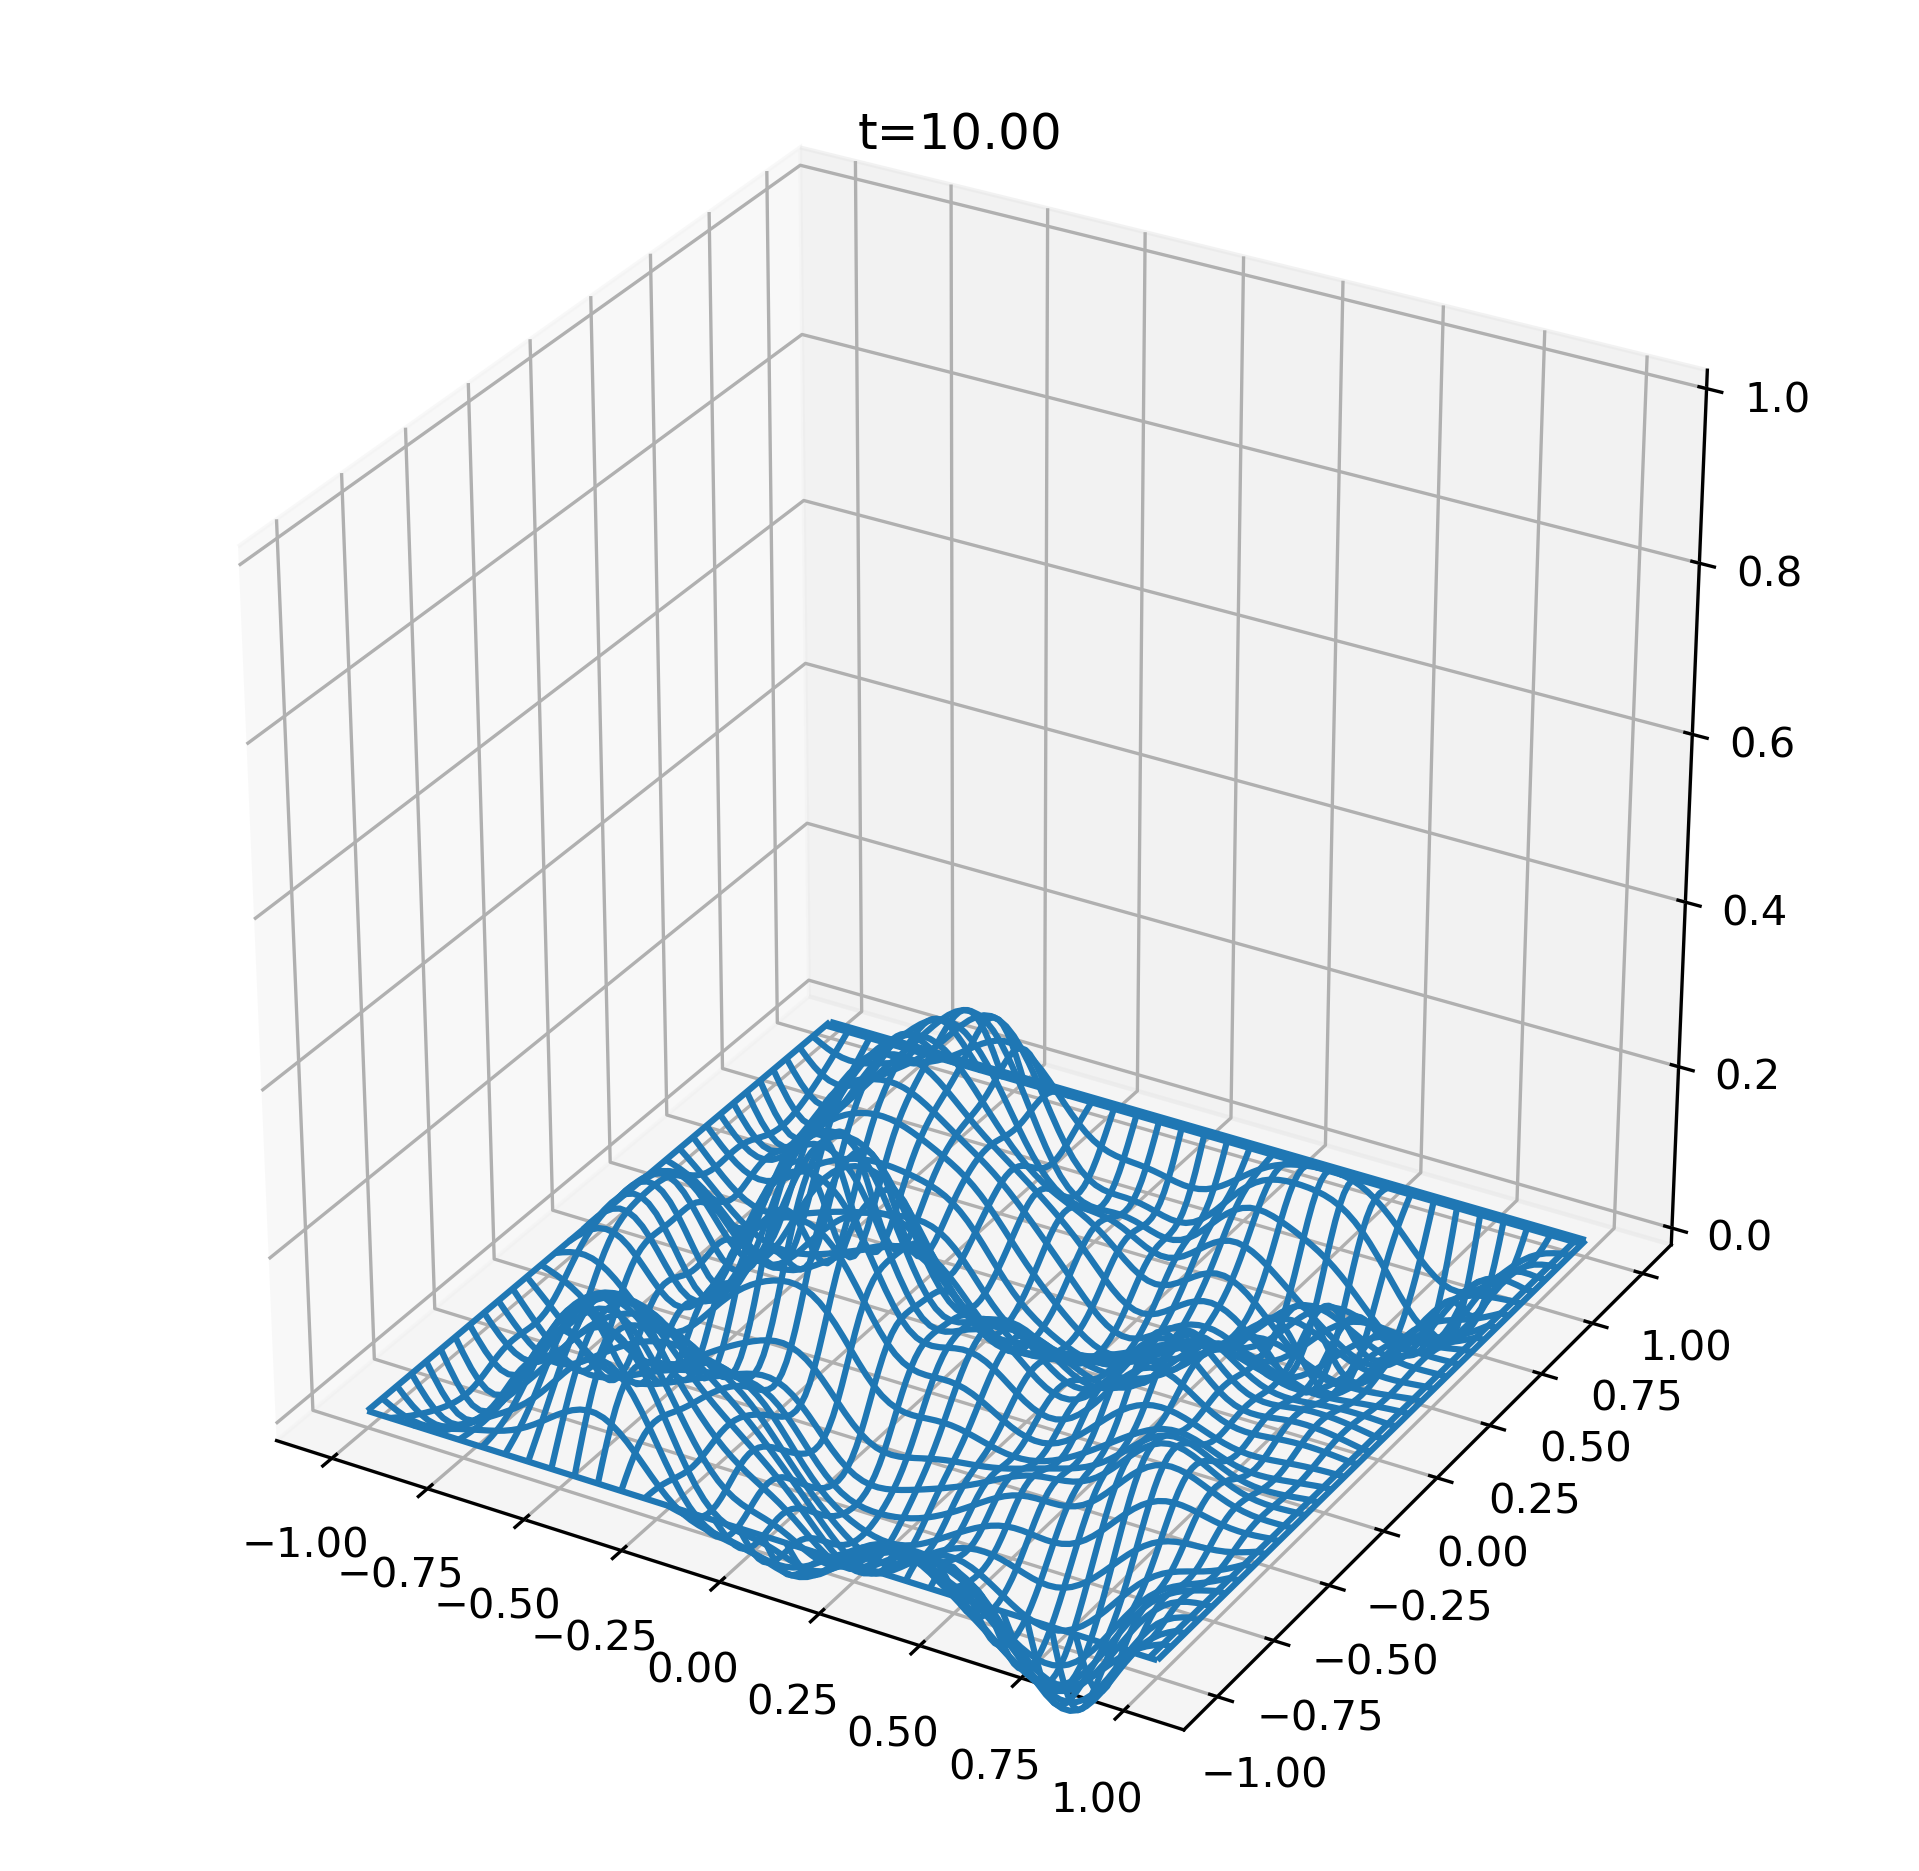

In [7]:
solveWaveEqn2d()


Make movie using ffmpeg:

ffmpeg -f image2 -framerate 10 -start_number 0 -i Frame%3d.png -vcodec mpeg4 -b:v 8M movie.mp4